In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
# 1674896 - right number
# 1675264

In [1]:
1675264 - 1674896

368

In [14]:
results = pd.read_csv('test_110.csv')
results1 = pd.read_csv('systematic/mega_ml/output_r_071.csv')

In [12]:
results1

,id,score
0,295246830,0.000004
1,295246831,0.000199
2,295246832,0.000008
3,295246833,0.000029
4,295246834,0.000197
...,...,...
1674891,296921721,0.000013
1674892,296921722,0.000010
1674893,296921723,0.000050
1674894,296921724,0.000041


In [5]:
len(results.id.unique())

1674896

In [6]:
results = results.drop_duplicates()

In [7]:
len(results.id.unique())

1674896

In [8]:
results.to_csv('output_random_full.csv',index=None)

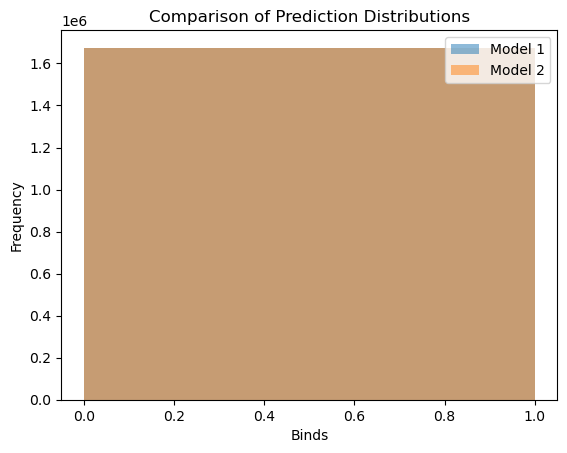

Statistics for Model 1:
count    1.674896e+06
mean     2.672832e-02
std      6.076741e-02
min      5.919294e-07
25%      6.461257e-04
50%      1.001842e-02
75%      3.802771e-02
max      1.000000e+00
Name: binds, dtype: float64

Statistics for Model 2:
count    1.674896e+06
mean     4.533274e-03
std      4.901945e-02
min      2.325442e-15
25%      2.358920e-06
50%      3.161652e-05
75%      3.081075e-04
max      1.000000e+00
Name: binds, dtype: float64

Blended predictions saved to blended_output.csv


In [15]:
import matplotlib.pyplot as plt
# Ensure the data is aligned and sorted by 'id'
results = results.sort_values('id').reset_index(drop=True)
results1 = results1.sort_values('id').reset_index(drop=True)

# Compare distributions of 'binds'
plt.hist(results['binds'], alpha=0.5, label='Model 1', bins=range(0, 2))
plt.hist(results1['binds'], alpha=0.5, label='Model 2', bins=range(0, 2))
plt.xlabel('Binds')
plt.ylabel('Frequency')
plt.title('Comparison of Prediction Distributions')
plt.legend()
plt.show()

# Display basic statistics
print("Statistics for Model 1:")
print(results['binds'].describe())

print("\nStatistics for Model 2:")
print(results1['binds'].describe())

# Blend predictions by averaging
results['blended_binds'] = (results['binds']*0.1 + results1['binds']*0.9)

# Save to new file
results.to_csv('blended_output.csv', columns=['id', 'blended_binds'], index=False)

print("\nBlended predictions saved to blended_output.csv")

In [3]:
results1 = pd.read_csv('submission_current_best.csv')

In [17]:
results1

,id,binds
0,295246830,0.064184
1,295246831,0.045017
2,295246832,0.022717
3,295246833,0.062334
4,295246834,0.067064
...,...,...
1674891,296921721,0.002360
1674892,296921722,0.001236
1674893,296921723,0.000565
1674894,296921724,0.002551


In [7]:
import pickle
with open('unique_blocks.pkl','rb') as f:
    (unique_list1_train, unique_list2_train, unique_list3_train) = pickle.load(f)
all = set(unique_list1_train).union(unique_list2_train).union(unique_list3_train)

In [8]:
test = pd.read_parquet('test.parquet')

In [9]:
test.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
0,295246830,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,BRD4
1,295246831,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,HSA
2,295246832,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,sEH
3,295246833,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,BRD4
4,295246834,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,HSA


In [14]:
noshare_ids = test[~(test['buildingblock1_smiles'].isin(all) | test['buildingblock2_smiles'].isin(all) | test['buildingblock3_smiles'].isin(all))]['id']

In [18]:
results1.to_csv('test_no_change.csv', columns=['id', 'binds'], index=False)

In [40]:
results1 = pd.read_csv('submission_current_best.csv')
results1.loc[results1['id'].isin(set(list(noshare_ids))), 'binds'] = np.clip(results1[results1['id'].isin(set(list(noshare_ids)))]['binds'] * 1.3,0,1)
results1.to_csv('test_130.csv', columns=['id', 'binds'], index=False)

In [34]:
results1

,id,binds
0,295246830,0.048138
1,295246831,0.033763
2,295246832,0.017038
3,295246833,0.046750
4,295246834,0.050298
...,...,...
1674891,296921721,0.002360
1674892,296921722,0.001236
1674893,296921723,0.000565
1674894,296921724,0.002551
